In [2]:
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
import spacy
from spacy import displacy 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
file = open('/content/gdrive/MyDrive/Sem5/os textbook tx.txt', 'r', encoding='utf-8')
T1 = file.read()

In [5]:
#performing pre-processing

# Remove Footer
T1 = re.sub('.* 4/4/06 .*\n', '', T1)
T1 = re.sub('[ ]*••[ ]*••\n', '', T1)

# Remove Header
T1 = re.sub('[0-9]+[ ]+Chapter.*\n', '', T1)
T1 = re.sub('[0-9]+.[0-9]+ ■.*[0-9]+\n', '', T1)
T1 = re.sub('Chapter [0-9]+ ■.*[0-9]+\n', '', T1)

# Remove all heading from the Text
T1 = re.sub(r'\d+(\.\d+)*\.\d+.*\n', '', T1)

# Remove Chapter Title
T1 = re.sub('[0-9]+\n[a-zA-Z ]+\n', '', T1)

# Join broken words
T1 = re.sub(r'-\n\s*', '', T1)

#Removing punctuations
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~■'''
cleantext = ""
for char in T1:
    if char not in punctuations:
        cleantext = cleantext + char

T1 = cleantext

# Remove tables 
arr = T1.split('\n')

allLines = []

idx = 0

for i in range(0, len(arr)):
  # Split each line into columns based on groups of spaces
  temp = re.split(r'\s{2,}', arr[i])
  if len(temp) <= 2:
    allLines.insert(idx, temp)
    idx += 1

finText = ''
for k in allLines: 
  if (len(k) > 1):
    finText += ' ' + k[1].lower()

finText[:2500]

' operating e ssentials operating e ssentials abraham silberschatz yale university peter baer galvin corporate technologies inc greg gagne westminster college sons inc all rights reserved sons inc 111 river street sons inc has been a valued source of knowledge and understanding for more and my nicolette avi silberschatz and my children gwen owen and maddie peter baer galvin and our sons tom and jay greg gagne chair of computer science at yale university prior to joining yale he was the vice president professor silberschatz is an acm fellow an ieee fellow and a member professor silberschatz writings have appeared in numerous acm and operating systems are an essential part of any computer system similarly a course on operating systems is an essential part of any computerscience education this field is undergoing rapid change as computers are now prevalent in virtually every application from games for children through the most sophisticated planning tools for governments and multinational

In [6]:
#Tokenizing the text
Token = nltk.word_tokenize(finText)
Token

['operating',
 'e',
 'ssentials',
 'operating',
 'e',
 'ssentials',
 'abraham',
 'silberschatz',
 'yale',
 'university',
 'peter',
 'baer',
 'galvin',
 'corporate',
 'technologies',
 'inc',
 'greg',
 'gagne',
 'westminster',
 'college',
 'sons',
 'inc',
 'all',
 'rights',
 'reserved',
 'sons',
 'inc',
 '111',
 'river',
 'street',
 'sons',
 'inc',
 'has',
 'been',
 'a',
 'valued',
 'source',
 'of',
 'knowledge',
 'and',
 'understanding',
 'for',
 'more',
 'and',
 'my',
 'nicolette',
 'avi',
 'silberschatz',
 'and',
 'my',
 'children',
 'gwen',
 'owen',
 'and',
 'maddie',
 'peter',
 'baer',
 'galvin',
 'and',
 'our',
 'sons',
 'tom',
 'and',
 'jay',
 'greg',
 'gagne',
 'chair',
 'of',
 'computer',
 'science',
 'at',
 'yale',
 'university',
 'prior',
 'to',
 'joining',
 'yale',
 'he',
 'was',
 'the',
 'vice',
 'president',
 'professor',
 'silberschatz',
 'is',
 'an',
 'acm',
 'fellow',
 'an',
 'ieee',
 'fellow',
 'and',
 'a',
 'member',
 'professor',
 'silberschatz',
 'writings',
 'have',

In [7]:
#Removing Stopwords
stop_words =set(stopwords.words('english'))
filtered_tokens =[w for w in Token if w not in stop_words]
Token = filtered_tokens
finText = " "
finText = finText.join(Token)
finText[:5000]

'operating e ssentials operating e ssentials abraham silberschatz yale university peter baer galvin corporate technologies inc greg gagne westminster college sons inc rights reserved sons inc 111 river street sons inc valued source knowledge understanding nicolette avi silberschatz children gwen owen maddie peter baer galvin sons tom jay greg gagne chair computer science yale university prior joining yale vice president professor silberschatz acm fellow ieee fellow member professor silberschatz writings appeared numerous acm operating systems essential part computer system similarly course operating systems essential part computerscience education field undergoing rapid change computers prevalent virtually every application games children sophisticated planning tools governments multinational firms yet fundamental concepts remain fairly clear base book wrote book text introductory course operating systems junior senior undergraduate level hope practitioners also find useful provides cl

In [8]:
#POS Tagging
postag = nltk.pos_tag(Token)
postag

[('operating', 'VBG'),
 ('e', 'NN'),
 ('ssentials', 'NNS'),
 ('operating', 'VBG'),
 ('e', 'NN'),
 ('ssentials', 'NNS'),
 ('abraham', 'VBP'),
 ('silberschatz', 'JJ'),
 ('yale', 'NNP'),
 ('university', 'NN'),
 ('peter', 'NN'),
 ('baer', 'NN'),
 ('galvin', 'JJ'),
 ('corporate', 'JJ'),
 ('technologies', 'NNS'),
 ('inc', 'VBP'),
 ('greg', 'JJ'),
 ('gagne', 'NN'),
 ('westminster', 'NN'),
 ('college', 'NN'),
 ('sons', 'NNS'),
 ('inc', 'JJ'),
 ('rights', 'NNS'),
 ('reserved', 'VBN'),
 ('sons', 'NNS'),
 ('inc', 'VBP'),
 ('111', 'CD'),
 ('river', 'NN'),
 ('street', 'NN'),
 ('sons', 'NNS'),
 ('inc', 'VBP'),
 ('valued', 'VBN'),
 ('source', 'NN'),
 ('knowledge', 'NN'),
 ('understanding', 'VBG'),
 ('nicolette', 'JJ'),
 ('avi', 'NN'),
 ('silberschatz', 'NN'),
 ('children', 'NNS'),
 ('gwen', 'VBP'),
 ('owen', 'NN'),
 ('maddie', 'NN'),
 ('peter', 'NN'),
 ('baer', 'NN'),
 ('galvin', 'NN'),
 ('sons', 'NNS'),
 ('tom', 'VBP'),
 ('jay', 'JJ'),
 ('greg', 'NN'),
 ('gagne', 'NN'),
 ('chair', 'NN'),
 ('computer

In [9]:
import nltk

In [10]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
category_freq = {}
f = []
for word in set(postag):
  if (word[1] == 'NN'):
    for syn in wn.synsets(word[0], wn.NOUN):
      key = syn.lexname().split('.')[1]
      if (key in category_freq):
        category_freq[key] += 1
      else:
        category_freq[key] = 1
      f.append(key)
      print(word[0], syn.lexname())

Streaming output truncated to the last 5000 lines.
range noun.location
range noun.object
range noun.artifact
range noun.group
range noun.group
range noun.cognition
range noun.artifact
administrator noun.person
administrator noun.person
administrator noun.person
count noun.quantity
count noun.act
count noun.person
jefferson noun.person
darwin noun.person
darwin noun.location
importance noun.attribute
importance noun.state
fraction noun.substance
fraction noun.artifact
fraction noun.quantity
multiplex noun.communication
multiplex noun.artifact
loo noun.artifact
hecht noun.person
striping noun.act
programming noun.act
programming noun.act
table noun.group
table noun.artifact
table noun.artifact
table noun.object
table noun.group
table noun.food
combination noun.group
combination noun.group
combination noun.group
combination noun.group
combination noun.group
combination noun.act
combination noun.act
script noun.communication
script noun.communication
script noun.communication
inclusion nou

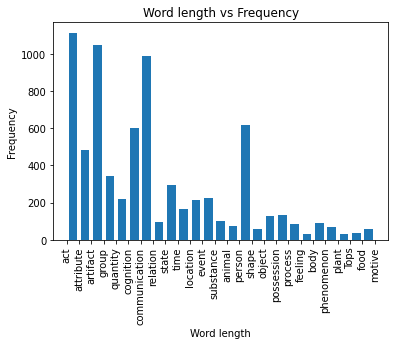

In [12]:
category = [x for (x, y) in category_freq.items()]
plt.hist(f, bins=category, rwidth=0.7)
plt.xlabel('Word length')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.title('Word length vs Frequency')
plt.show()

interrupt verb.communication
interrupt verb.change
interrupt verb.change
interrupt verb.change
confer verb.communication
confer verb.possession
decrease verb.change
decrease verb.change
enable verb.change
cause verb.creation
cause verb.communication
reproduce verb.creation
reproduce verb.body
reproduce verb.creation
reproduce verb.communication
study verb.cognition
study verb.cognition
study verb.perception
study verb.cognition
study verb.cognition
study verb.cognition
keys verb.cognition
keys verb.possession
keys verb.contact
keys verb.change
keys verb.change
executed verb.social
executed verb.social
executed verb.creation
executed verb.social
executed verb.social
executed verb.creation
executed verb.communication
fill verb.change
fill verb.change
fill verb.stative
fill verb.social
fill verb.consumption
fill verb.social
fill verb.consumption
fill verb.consumption
fill verb.change
trigger verb.creation
trigger verb.competition
fast verb.consumption
fast verb.consumption
avoid verb.comm

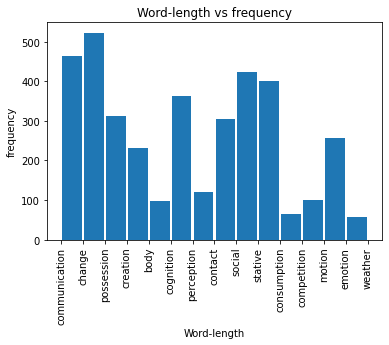

In [13]:
category_freq1 = {}
f1 = []
for word in set(postag):
  if (word[1] == 'VB'):
    for syn in wn.synsets(word[0], wn.VERB):
      key = syn.lexname().split('.')[1]
      if (key in category_freq1):
        category_freq1[key] += 1
      else:
        category_freq1[key] = 1
      f1.append(key)
      print(word[0], syn.lexname())


cat1 = [x for (x, y) in category_freq1.items()]
plt.hist(f1, bins=cat1, rwidth=0.9)
plt.xlabel('Word-length')
plt.xticks(rotation='vertical')
plt.ylabel('frequency')
plt.title('Word-length vs frequency')
plt.show()

In [14]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(finText)

In [15]:
displacy.render(doc[8000:9000], style='ent', jupyter=True)

In [16]:
FN = 4
TP = 7
FP = 0
TN = 989

precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + FN + FP + TN)
recall = TP / (TP + FN)
F1Score = 2 * precision * recall / (precision + recall)

accuracy, F1Score

(0.996, 0.7777777777777778)